In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras

In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

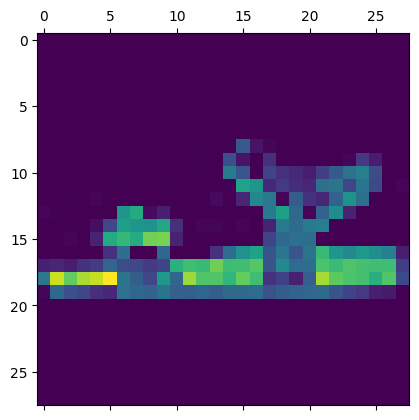

In [6]:
plt.matshow(X_train_full[59999])

In [7]:
X_valid,X_train=X_train_full[:5000],X_train_full[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [8]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

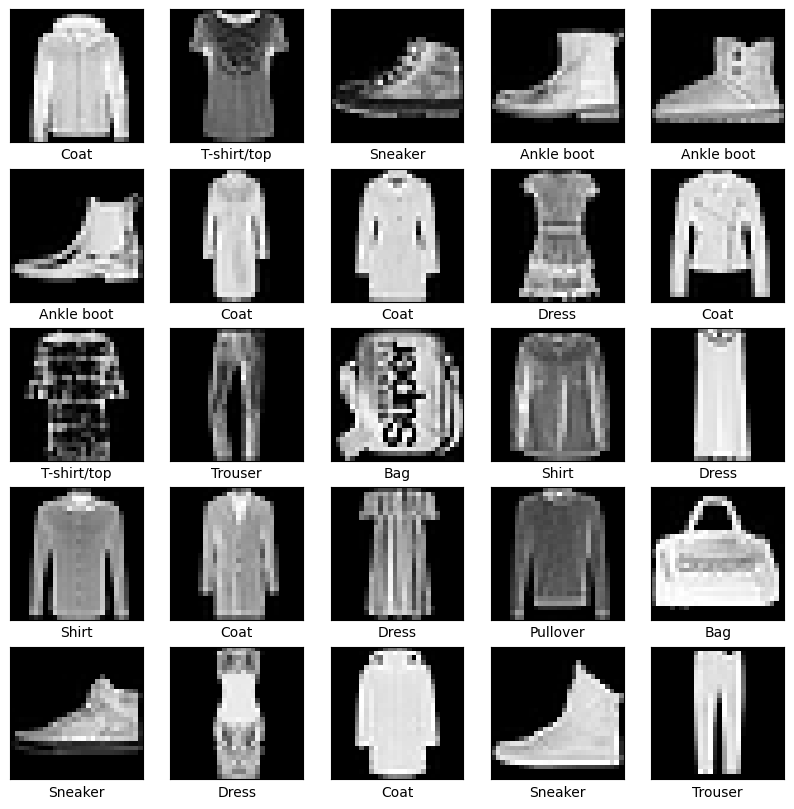

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i],cmap='gray')
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
class_names[y_train[5]]

'Ankle boot'

In [14]:
from tensorflow.keras import Sequential

In [15]:
from tensorflow.keras.layers import Dense, Flatten

In [18]:
model=Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 100,710
Trainable params: 100,710
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
m=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.7154 - accuracy: 0.7205 - val_loss: 0.7449 - val_accuracy: 0.7576
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7064 - accuracy: 0.7739 - val_loss: 0.8790 - val_accuracy: 0.7312
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7372 - accuracy: 0.7656 - val_loss: 0.6938 - val_accuracy: 0.7770
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7111 - accuracy: 0.7639 - val_loss: 0.6792 - val_accuracy: 0.7916
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6025 - accuracy: 0.8068 - val_loss: 0.6110 - val_accuracy: 0.8166
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5468 - accuracy: 0.8222 - val_loss: 0.4781 - val_accuracy: 0.8466
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4727 - accuracy: 0.8385 - val_loss: 0.5440 - val_accuracy

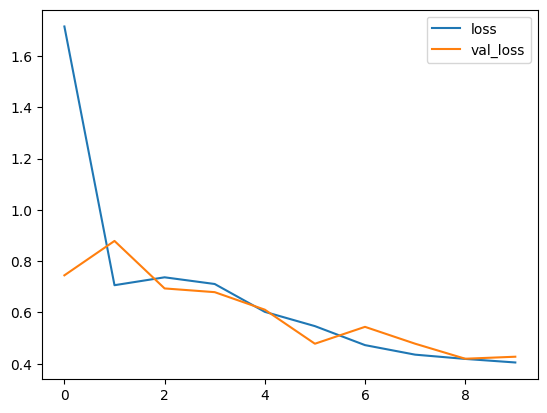

In [24]:
plt.plot(m.history['loss'],label='loss')
plt.plot(m.history['val_loss'],label='val_loss')
plt.legend()

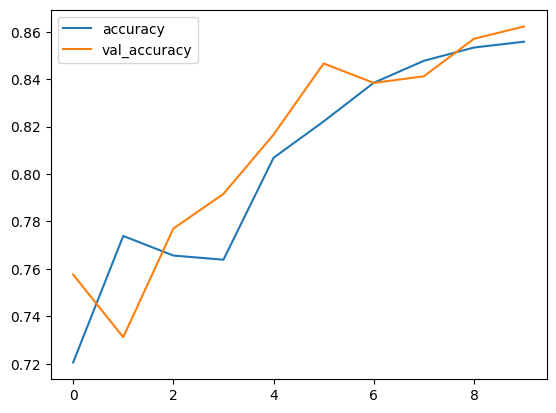

In [25]:
plt.plot(m.history['accuracy'],label='accuracy')
plt.plot(m.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [26]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4544 - accuracy: 0.8444


[0.45443880558013916, 0.8443999886512756]

In [38]:
X_new=X_test[:25]
y_pred_proba=model.predict(X_new)
y_pred_proba.round(2)

1/1 [==============================] - 0s 24ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.95],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.37, 0.01, 0.06, 0.12, 0.03, 0.  , 0.39, 0.  , 0.01, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.07, 0.09, 0.59, 0.  , 0.23, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.06, 0.  , 0.93, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.4 , 0.  , 0.58, 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.44, 0.  , 0.53, 0.02, 0.01],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.11, 0.01, 0.

In [39]:
y_pred=np.argmax(model.predict(X_new),axis=-1)
y_pred

1/1 [==============================] - 0s 23ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1])

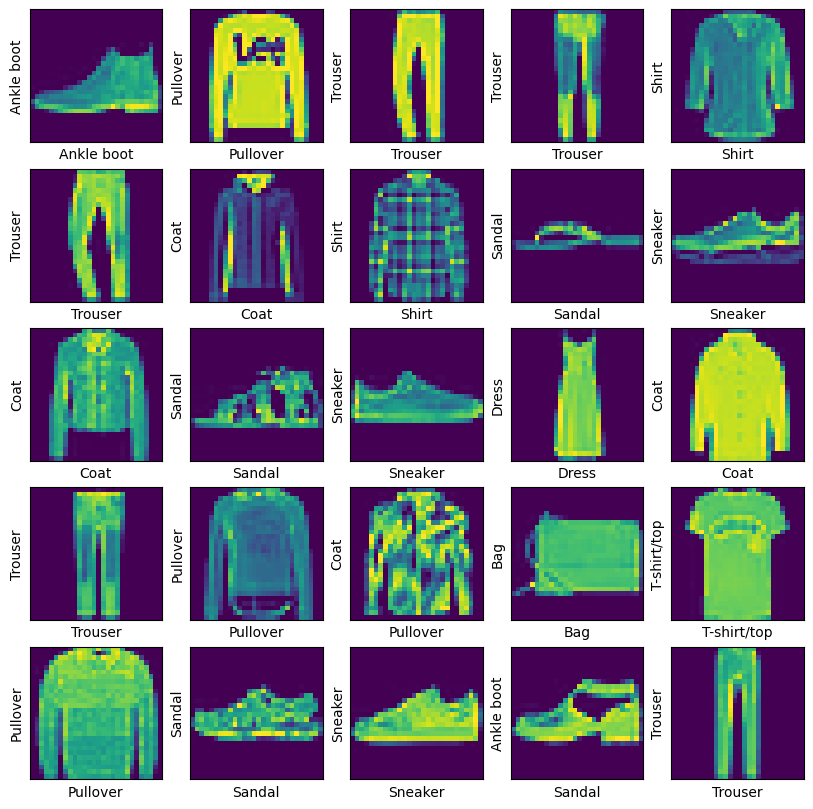

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[i])
  plt.xlabel(class_names[y_pred[i]])
  plt.ylabel(class_names[y_test[i]])
plt.show()